## Backend 

V temu delu bom izvajal osnovne operacije nad podatki.

### Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [30]:
#reading the CSV file

#read the data and split by ","
data = pd.read_csv('podatki/student_data.csv', sep=",", encoding="windows-1250")

%store data

Stored 'data' (DataFrame)


In [31]:
#show the head of the data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [32]:
#show the tail of the data
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [33]:
print(data.shape)

(395, 33)


In [34]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Text(0.5, 1.0, 'Število študentov glede na vrsto šole')

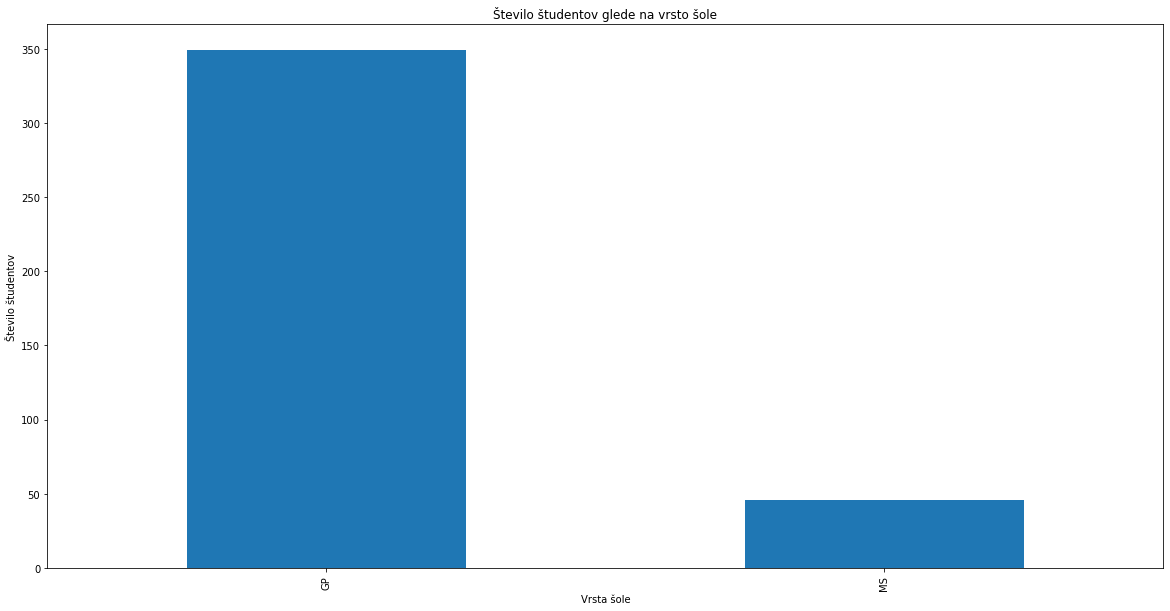

In [35]:
#get school type and plot number of recordings based on school type

plt.figure(figsize=(20,10))
plt.ascending = True
data.school.value_counts().plot(kind='bar')
plt.ylabel('Število študentov')
plt.xlabel('Vrsta šole')
plt.title('Število študentov glede na vrsto šole')

Text(0.5, 1.0, 'Povprečna ocena glede na vrsto šole')

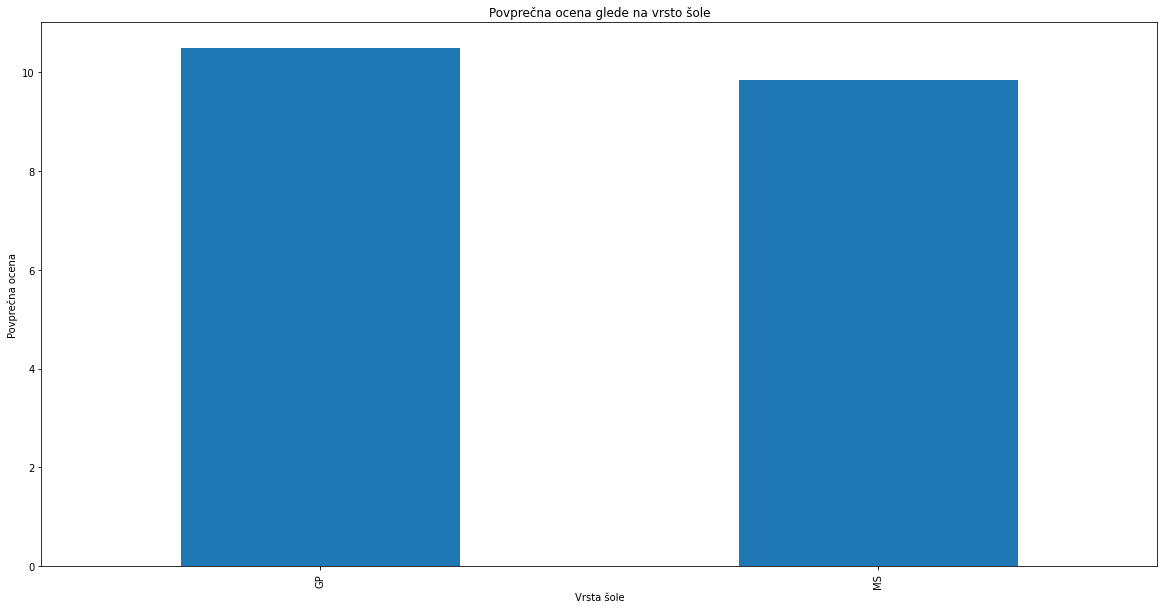

In [69]:
#get average grade for each school type

plt.figure(figsize=(20,10))
data.groupby('school')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Vrsta šole')
plt.title('Povprečna ocena glede na vrsto šole')



Text(0.5, 1.0, 'Povprečna ocena glede na zaposlitev staršev')

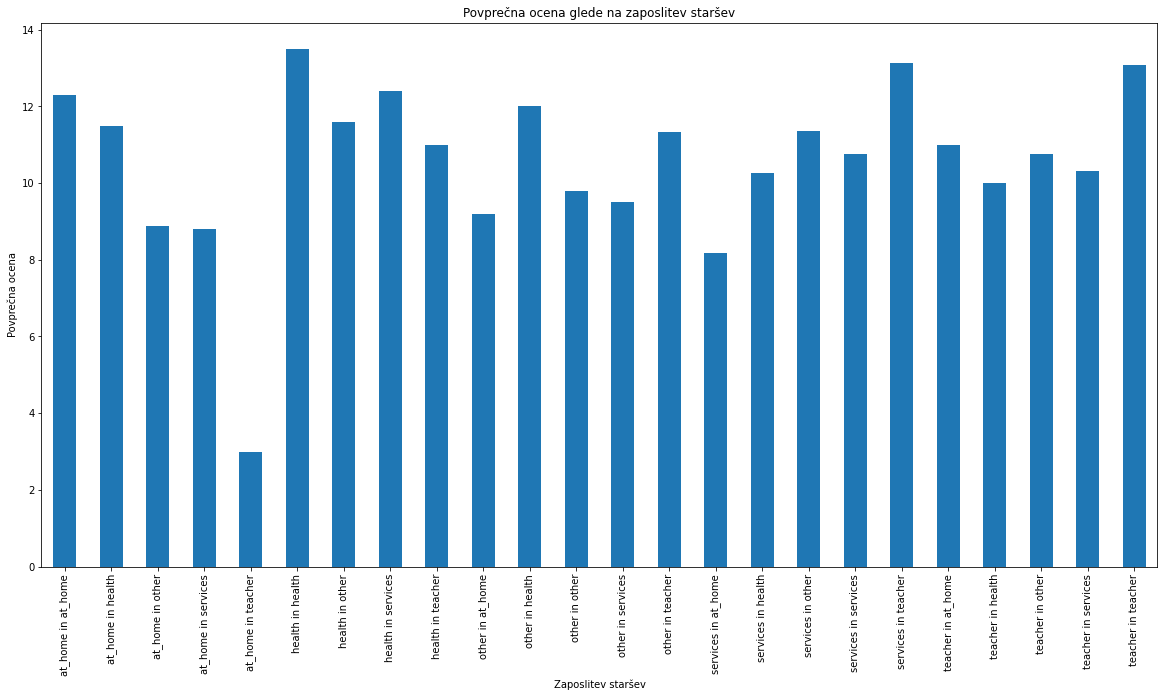

In [38]:
#combine the mothers and fathers job

data['M+FJob'] = data['Mjob'] + ' in ' + data['Fjob']

#use the data['M+FJob'] to get the average grade for each job combination

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('M+FJob')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Zaposlitev staršev')
plt.title('Povprečna ocena glede na zaposlitev staršev')




Text(0.5, 1.0, 'Distribucija zaposlitev staršev')

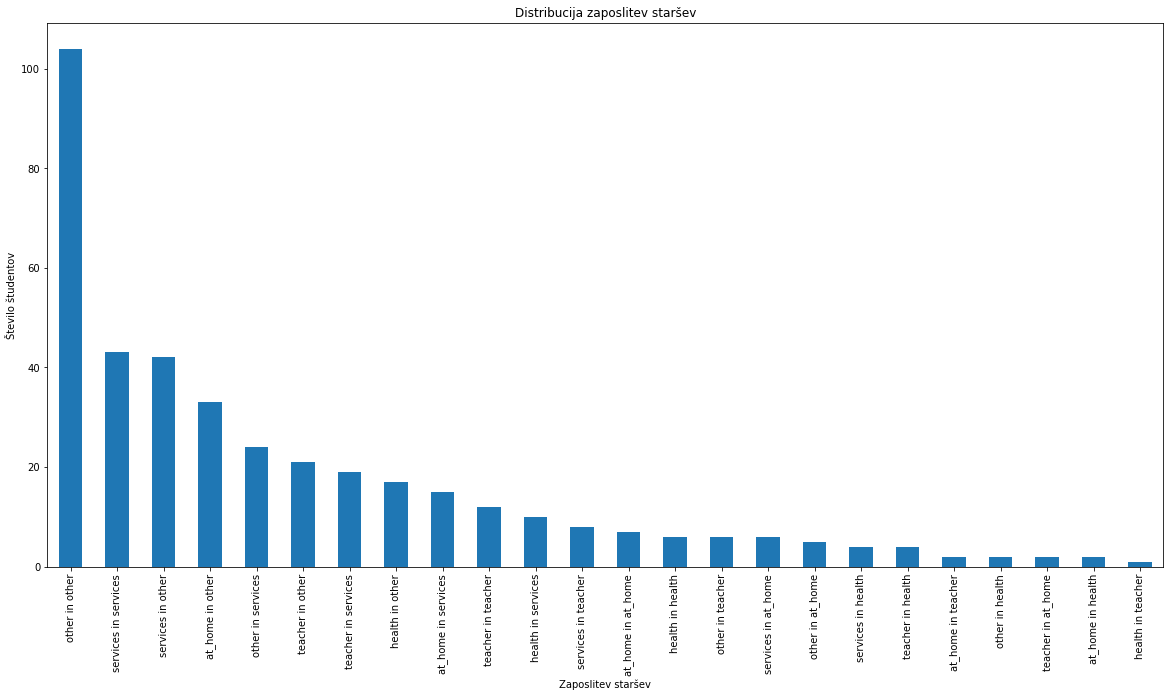

In [47]:
#distriubtion of mother and father jobs using percentage

plt.figure(figsize=(20,10))
plt.ascending = True
data['M+FJob'].value_counts().plot(kind='bar')
plt.ylabel('Število študentov')
plt.xlabel('Zaposlitev staršev')
plt.title('Distribucija zaposlitev staršev')



Text(0.5, 1.0, 'Povprečna ocena glede na število neuspešnih let')

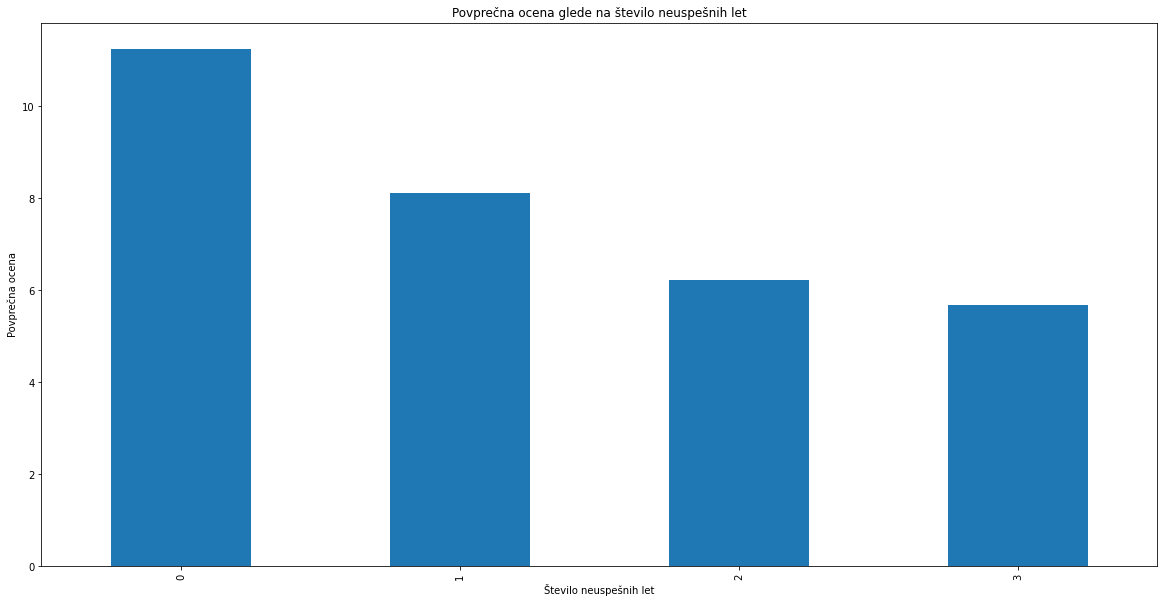

In [48]:
#show the number of past failiures and the 
#average grade for each number of past failures

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('failures')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Število neuspešnih let')
plt.title('Povprečna ocena glede na število neuspešnih let')


Text(0.5, 1.0, 'Število neuspešnih let glede na romantično zvezo')

<Figure size 1440x720 with 0 Axes>

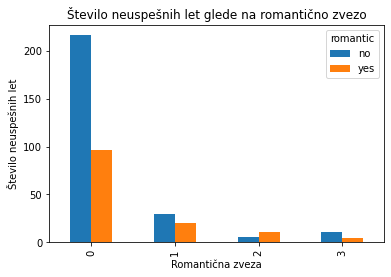

In [70]:
#Show the number of failiures by if the student is in a romantic relationship where relationship in different colors using heatmap

plt.figure(figsize=(20,10))
pd.crosstab(data['failures'], data['romantic']).plot(kind='bar')
plt.ylabel('Število neuspešnih let')
plt.xlabel('Romantična zveza')
plt.title('Število neuspešnih let glede na romantično zvezo')




Text(0.5, 1.0, 'Želja za višjo izobrazbo glede na število članov družine')

<Figure size 1440x720 with 0 Axes>

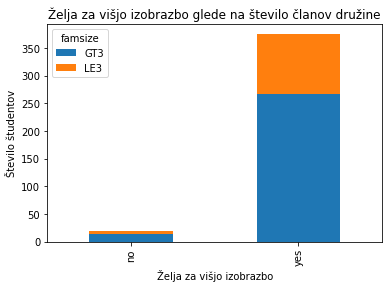

In [67]:
#Distribution of students that want higher education by family size

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby(['higher', 'famsize'])['G3'].count().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Število študentov')
plt.xlabel('Želja za višjo izobrazbo')
plt.title('Želja za višjo izobrazbo glede na število članov družine')


Text(0.5, 1.0, 'Povprečna ocena glede na željo po višji izobrazbi')

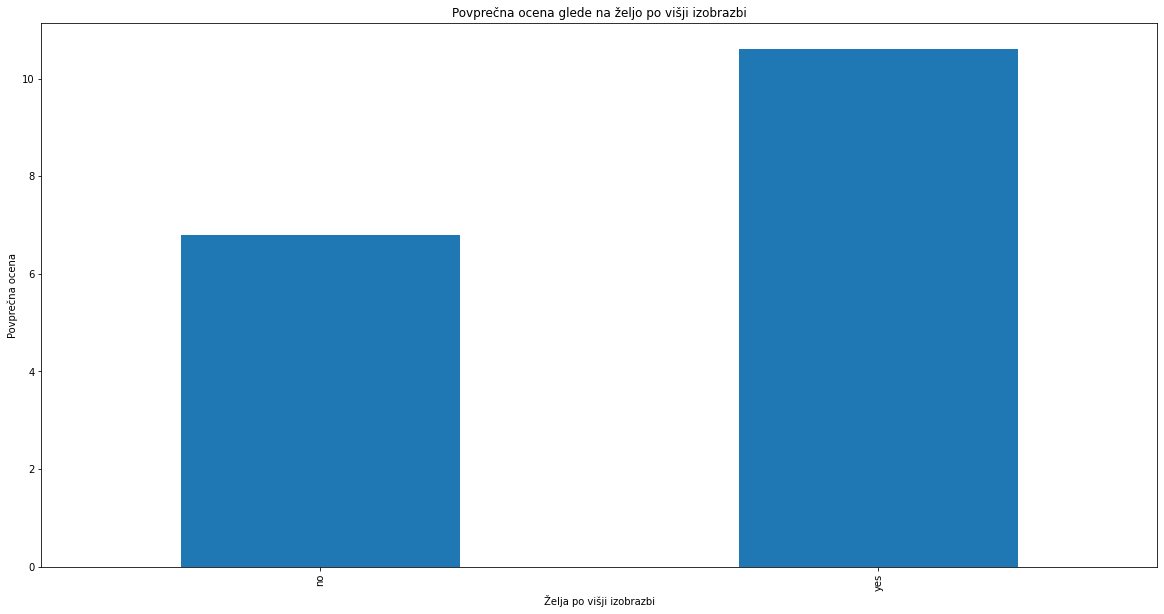

In [65]:
#Distribution between average grade and if they want higher education

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('higher')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Želja po višji izobrazbi')
plt.title('Povprečna ocena glede na željo po višji izobrazbi')
